In [ ]:

# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

train_datagen = image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, zoom_range=0.2)
train_data = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/archive (1)/chest_xray/train', 
                                               target_size = (256,256), batch_size=16, class_mode='binary')

Found 5222 images belonging to 2 classes.


In [ ]:

train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
val_datagen = image.ImageDataGenerator(rescale=1/255)
val_data = val_datagen.flow_from_directory(directory= '/content/drive/MyDrive/archive (1)/chest_xray/val', 
					                                     target_size = (256,256), batch_size=16, class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
val_datagen = image.ImageDataGenerator(rescale=1/255)
val_data = val_datagen.flow_from_directory(directory= '/content/drive/MyDrive/archive (1)/chest_xray/train/NORMAL', 
					                                     target_size = (256,256), batch_size=16, class_mode='binary')

Found 0 images belonging to 0 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
model.fit_generator(train_data, steps_per_epoch=8, epochs=10, validation_data = val_data)

Epoch 1/10
8/8 [==============================] - 108s 13s/step - loss: 0.8544 - accuracy: 0.6328
Epoch 2/10
8/8 [==============================] - 46s 6s/step - loss: 0.5769 - accuracy: 0.7812
Epoch 3/10
8/8 [==============================] - 48s 6s/step - loss: 0.5559 - accuracy: 0.7734
Epoch 4/10
8/8 [==============================] - 47s 6s/step - loss: 0.6329 - accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 48s 6s/step - loss: 0.5941 - accuracy: 0.7734
Epoch 6/10
8/8 [==============================] - 45s 5s/step - loss: 0.5572 - accuracy: 0.7422
Epoch 7/10
8/8 [==============================] - 46s 6s/step - loss: 0.5495 - accuracy: 0.7109
Epoch 8/10
8/8 [==============================] - 45s 6s/step - loss: 0.4936 - accuracy: 0.7969
Epoch 9/10
8/8 [==============================] - 47s 6s/step - loss: 0.3932 - accuracy: 0.8203
Epoch 10/10
8/8 [==============================] - 48s 6s/step - loss: 0.3173 - accuracy: 0.8594


(1, 256, 256, 3)

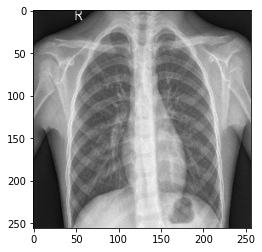

In [ ]:
path="/content/drive/MyDrive/archive (1)/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
img = image.load_img(path, target_size=(256,256,3))
img = image.img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

(1, 256, 256, 3)

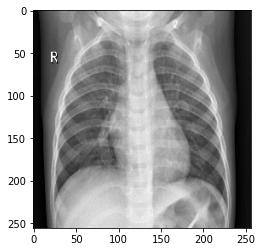

In [ ]:
path="/content/drive/MyDrive/archive (1)/chest_xray/test/NORMAL/IM-0084-0001.jpeg"
img = image.load_img(path, target_size=(256,256,3))
img = image.img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [ ]:


predict_prob=model.predict([img])

In [ ]:

train_data.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}